# Gradient-boosted Tree Feature Importances

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
importances = {0: 0.0713, 1: 0.0494, 2: 0.0332, 3: 0.1016, 4: 0.0276, 5: 0.0405, 6: 0.0231, 7: 0.0358, 8: 0.0377, 9: 0.0233, 10: 0.0123, 11: 0.0083, 12: 0.0167, 13: 0.0331, 14: 0.0036, 15: 0.072, 16: 0.0084, 17: 0.0049, 18: 0.0693, 19: 0.0648, 20: 0.0086, 21: 0.0158, 22: 0.0118, 23: 0.0114, 24: 0.0123, 25: 0.0072, 26: 0.0074, 27: 0.0074, 28: 0.004, 29: 0.0028, 30: 0.0031, 31: 0.003, 32: 0.004, 33: 0.0043, 34: 0.0041, 35: 0.0046, 36: 0.0038, 37: 0.0067, 38: 0.0067, 39: 0.001, 40: 0.0003, 41: 0.0023, 42: 0.0004, 43: 0.0007, 44: 0.0009, 45: 0.0072, 46: 0.0017, 47: 0.0013, 48: 0.001, 49: 0.0057, 50: 0.0005, 51: 0.0027, 52: 0.0022, 53: 0.0004, 54: 0.0009, 55: 0.0009, 56: 0.0002, 57: 0.0001, 58: 0.0005, 59: 0.0001, 60: 0.0002, 61: 0.0004, 62: 0.0002, 63: 0.0003, 64: 0.0002, 65: 0.0002, 66: 0.001, 67: 0.002, 68: 0.0005, 69: 0.0004, 70: 0.0021, 71: 0.0004, 72: 0.0004, 73: 0.0012, 74: 0.0014, 75: 0.0002, 76: 0.0003, 77: 0.0013, 78: 0.0005, 79: 0.0003, 80: 0.0002, 81: 0.0002, 82: 0.0006, 83: 0.0004, 84: 0.0013, 85: 0.0004, 86: 0.0001, 87: 0.0001, 88: 0.0009, 89: 0.0002, 90: 0.0004, 91: 0.0003, 92: 0.0003, 93: 0.0023, 94: 0.0007, 95: 0.0001, 96: 0.0013, 97: 0.0005, 98: 0.0012, 99: 0.001, 100: 0.001, 101: 0.0003, 102: 0.0001, 103: 0.0006, 104: 0.0016, 105: 0.0044, 106: 0.0001, 107: 0.001, 108: 0.0021, 109: 0.0002, 110: 0.0004, 111: 0.0002, 112: 0.0008, 113: 0.0015, 114: 0.0006, 115: 0.0005, 116: 0.0001, 117: 0.0016, 118: 0.0018, 119: 0.0001, 120: 0.0002, 121: 0.0003, 122: 0.0005, 123: 0.0002, 125: 0.0009, 126: 0.0002, 127: 0.0002, 128: 0.0002, 129: 0.001, 130: 0.0002, 131: 0.0019, 132: 0.0004, 133: 0.002, 134: 0.0026, 135: 0.0004, 136: 0.0001, 137: 0.0001, 138: 0.0014, 139: 0.0005, 140: 0.0, 141: 0.0001, 142: 0.0015, 143: 0.0001, 144: 0.0006, 145: 0.0002, 146: 0.0001, 147: 0.0004, 148: 0.0003, 149: 0.0005, 150: 0.0001, 151: 0.0006, 152: 0.0402}

In [3]:
df = pd.DataFrame({"reference": importances.keys(), "importanceValue": importances.values()})
importance = df.drop(columns = ['reference'])
importance

,importanceValue
0,0.0713
1,0.0494
2,0.0332
3,0.1016
4,0.0276
...,...
147,0.0003
148,0.0005
149,0.0001
150,0.0006


In [4]:
featuresList = ['MONTH',
 'DAY_OF_WEEK', 
 'DISTANCE_GROUP',
 'SEGMENT_NUMBER',
 'CONCURRENT_FLIGHTS',
 'NUMBER_OF_SEATS',
 'AIRPORT_FLIGHTS_MONTH',
 'AIRLINE_FLIGHTS_MONTH',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'AVG_MONTHLY_PASS_AIRPORT',
 'AVG_MONTHLY_PASS_AIRLINE',
 'FLT_ATTENDANTS_PER_PASS',
 'GROUND_SERV_PER_PASS',
 'PLANE_AGE',
 'PREVIOUS_AIRPORT',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'AWND',
 'DEP_TIME_BLK_0001_0559',
 'DEP_TIME_BLK_0600_0659',
 'DEP_TIME_BLK_0700_0759',
 'DEP_TIME_BLK_0800_0859',
 'DEP_TIME_BLK_0900_0959',
 'DEP_TIME_BLK_1000_1059',
 'DEP_TIME_BLK_1100_1159',
 'DEP_TIME_BLK_1200_1259',
 'DEP_TIME_BLK_1300_1359',
 'DEP_TIME_BLK_1400_1459',
 'DEP_TIME_BLK_1500_1559',
 'DEP_TIME_BLK_1600_1659',
 'DEP_TIME_BLK_1700_1759',
 'DEP_TIME_BLK_1800_1859',
 'DEP_TIME_BLK_1900_1959',
 'DEP_TIME_BLK_2000_2059',
 'DEP_TIME_BLK_2100_2159',
 'DEP_TIME_BLK_2200_2259',
 'DEP_TIME_BLK_2300_2359',
 'CARRIER_NAME_Alaska_Airlines_Inc',
 'CARRIER_NAME_Allegiant_Air',
 'CARRIER_NAME_American_Airlines_Inc',
 'CARRIER_NAME_American_Eagle_Airlines_Inc',
 'CARRIER_NAME_Atlantic_Southeast_Airlines',
 'CARRIER_NAME_Comair_Inc',
 'CARRIER_NAME_Delta_Air_Lines_Inc',
 'CARRIER_NAME_Endeavor_Air_Inc',
 'CARRIER_NAME_Frontier_Airlines_Inc',
 'CARRIER_NAME_Hawaiian_Airlines_Inc',
 'CARRIER_NAME_JetBlue_Airways',
 'CARRIER_NAME_Mesa_Airlines_Inc',
 'CARRIER_NAME_Midwest_Airline,_Inc',
 'CARRIER_NAME_SkyWest_Airlines_Inc',
 'CARRIER_NAME_Southwest_Airlines_Co',
 'CARRIER_NAME_Spirit_Air_Lines',
 'CARRIER_NAME_United_Air_Lines_Inc',
 'DEPARTING_AIRPORT_Adams_Field',
 'DEPARTING_AIRPORT_Albany_International',
 'DEPARTING_AIRPORT_Albuquerque_International_Sunport',
 'DEPARTING_AIRPORT_Anchorage_International',
 'DEPARTING_AIRPORT_Atlanta_Municipal',
 'DEPARTING_AIRPORT_Austin___Bergstrom_International',
 'DEPARTING_AIRPORT_Birmingham_Airport',
 'DEPARTING_AIRPORT_Boise_Air_Terminal',
 'DEPARTING_AIRPORT_Bradley_International',
 'DEPARTING_AIRPORT_Charleston_International',
 'DEPARTING_AIRPORT_Chicago_Midway_International',
 'DEPARTING_AIRPORT_Chicago_OHare_International',
 'DEPARTING_AIRPORT_Cincinnati_Northern_Kentucky_International',
 'DEPARTING_AIRPORT_Cleveland_Hopkins_International',
 'DEPARTING_AIRPORT_Dallas_Fort_Worth_Regional',
 'DEPARTING_AIRPORT_Dallas_Love_Field',
 'DEPARTING_AIRPORT_Des_Moines_Municipal',
 'DEPARTING_AIRPORT_Detroit_Metro_Wayne_County',
 'DEPARTING_AIRPORT_Douglas_Municipal',
 'DEPARTING_AIRPORT_El_Paso_International',
 'DEPARTING_AIRPORT_Eppley_Airfield',
 'DEPARTING_AIRPORT_Fort_Lauderdale_Hollywood_International',
 'DEPARTING_AIRPORT_Friendship_International',
 'DEPARTING_AIRPORT_General_Mitchell_Field',
 'DEPARTING_AIRPORT_Greater_Buffalo_International',
 'DEPARTING_AIRPORT_Greenville_Spartanburg',
 'DEPARTING_AIRPORT_Hollywood_Burbank_Midpoint',
 'DEPARTING_AIRPORT_Honolulu_International',
 'DEPARTING_AIRPORT_Houston_Intercontinental',
 'DEPARTING_AIRPORT_Indianapolis_Muni_Weir_Cook',
 'DEPARTING_AIRPORT_Jacksonville_International',
 'DEPARTING_AIRPORT_James_M_Cox_Dayton_International',
 'DEPARTING_AIRPORT_John_F_Kennedy_International',
 'DEPARTING_AIRPORT_Kahului_Airport',
 'DEPARTING_AIRPORT_Kansas_City_International',
 'DEPARTING_AIRPORT_Keahole',
 'DEPARTING_AIRPORT_Kent_County',
 'DEPARTING_AIRPORT_LaGuardia',
 'DEPARTING_AIRPORT_Lambert_St_Louis_International',
 'DEPARTING_AIRPORT_Lihue_Airport',
 'DEPARTING_AIRPORT_Logan_International',
 'DEPARTING_AIRPORT_Long_Beach_Daugherty_Field',
 'DEPARTING_AIRPORT_Los_Angeles_International',
 'DEPARTING_AIRPORT_Louis_Armstrong_New_Orleans_International',
 'DEPARTING_AIRPORT_McCarran_International',
 'DEPARTING_AIRPORT_McGhee_Tyson',
 'DEPARTING_AIRPORT_Memphis_International',
 'DEPARTING_AIRPORT_Metropolitan_Oakland_International',
 'DEPARTING_AIRPORT_Miami_International',
 'DEPARTING_AIRPORT_Minneapolis_St_Paul_International',
 'DEPARTING_AIRPORT_Myrtle_Beach_International',
 'DEPARTING_AIRPORT_Nashville_International',
 'DEPARTING_AIRPORT_Newark_Liberty_International',
 'DEPARTING_AIRPORT_Norfolk_International',
 'DEPARTING_AIRPORT_Northwest_Arkansas_Regional',
 'DEPARTING_AIRPORT_Ontario_International',
 'DEPARTING_AIRPORT_Orange_County',
 'DEPARTING_AIRPORT_Orlando_International',
 'DEPARTING_AIRPORT_Palm_Beach_International',
 'DEPARTING_AIRPORT_Palm_Springs_International',
 'DEPARTING_AIRPORT_Pensacola_Regional',
 'DEPARTING_AIRPORT_Philadelphia_International',
 'DEPARTING_AIRPORT_Phoenix_Sky_Harbor_International',
 'DEPARTING_AIRPORT_Piedmont_Triad_International',
 'DEPARTING_AIRPORT_Pittsburgh_International',
 'DEPARTING_AIRPORT_Port_Columbus_International',
 'DEPARTING_AIRPORT_Portland_International',
 'DEPARTING_AIRPORT_Puerto_Rico_International',
 'DEPARTING_AIRPORT_Raleigh_Durham_International',
 'DEPARTING_AIRPORT_Reno_Tahoe_International',
 'DEPARTING_AIRPORT_Richmond_International',
 'DEPARTING_AIRPORT_Rochester_Monroe_County',
 'DEPARTING_AIRPORT_Ronald_Reagan_Washington_National',
 'DEPARTING_AIRPORT_Sacramento_International',
 'DEPARTING_AIRPORT_Salt_Lake_City_International',
 'DEPARTING_AIRPORT_San_Antonio_International',
 'DEPARTING_AIRPORT_San_Diego_International_Lindbergh_Fl',
 'DEPARTING_AIRPORT_San_Francisco_International',
 'DEPARTING_AIRPORT_San_Jose_International',
 'DEPARTING_AIRPORT_Sanford_NAS',
 'DEPARTING_AIRPORT_Savannah_Hilton_Head_International',
 'DEPARTING_AIRPORT_Seattle_International',
 'DEPARTING_AIRPORT_Southwest_Florida_International',
 'DEPARTING_AIRPORT_Spokane_International',
 'DEPARTING_AIRPORT_Standiford_Field',
 'DEPARTING_AIRPORT_Stapleton_International',
 'DEPARTING_AIRPORT_Syracuse_Hancock_International',
 'DEPARTING_AIRPORT_Tampa_International',
 'DEPARTING_AIRPORT_Theodore_Francis_Green_State',
 'DEPARTING_AIRPORT_Truax_Field',
 'DEPARTING_AIRPORT_Tucson_International',
 'DEPARTING_AIRPORT_Tulsa_International',
 'DEPARTING_AIRPORT_Washington_Dulles_International',
 'DEPARTING_AIRPORT_Will_Rogers_World',
 'DEPARTING_AIRPORT_William_P_Hobby',
 'principal_component']

In [5]:
df1 = pd.DataFrame(featuresList, columns = ['columnName'])
df1

,columnName
0,MONTH
1,DAY_OF_WEEK
2,DISTANCE_GROUP
3,SEGMENT_NUMBER
4,CONCURRENT_FLIGHTS
...,...
147,DEPARTING_AIRPORT_Tulsa_International
148,DEPARTING_AIRPORT_Washington_Dulles_International
149,DEPARTING_AIRPORT_Will_Rogers_World
150,DEPARTING_AIRPORT_William_P_Hobby


In [6]:
df2 = pd.concat([df1, importance], axis = 1)
df2

,columnName,importanceValue
0,MONTH,0.0713
1,DAY_OF_WEEK,0.0494
2,DISTANCE_GROUP,0.0332
3,SEGMENT_NUMBER,0.1016
4,CONCURRENT_FLIGHTS,0.0276
...,...,...
147,DEPARTING_AIRPORT_Tulsa_International,0.0003
148,DEPARTING_AIRPORT_Washington_Dulles_International,0.0005
149,DEPARTING_AIRPORT_Will_Rogers_World,0.0001
150,DEPARTING_AIRPORT_William_P_Hobby,0.0006


In [7]:
df3 = pd.DataFrame(df2).sort_values(by = ['importanceValue'], ascending = True)
df3

,columnName,importanceValue
139,DEPARTING_AIRPORT_Spokane_International,0.0000
95,DEPARTING_AIRPORT_Lihue_Airport,0.0001
87,DEPARTING_AIRPORT_James_M_Cox_Dayton_Internati...,0.0001
145,DEPARTING_AIRPORT_Truax_Field,0.0001
116,DEPARTING_AIRPORT_Pensacola_Regional,0.0001
...,...,...
19,AWND,0.0648
18,TMAX,0.0693
0,MONTH,0.0713
15,PRCP,0.0720


In [8]:
df4 = df3.reset_index(drop = True)
df4

,columnName,importanceValue
0,DEPARTING_AIRPORT_Spokane_International,0.0000
1,DEPARTING_AIRPORT_Lihue_Airport,0.0001
2,DEPARTING_AIRPORT_James_M_Cox_Dayton_Internati...,0.0001
3,DEPARTING_AIRPORT_Truax_Field,0.0001
4,DEPARTING_AIRPORT_Pensacola_Regional,0.0001
...,...,...
147,AWND,0.0648
148,TMAX,0.0693
149,MONTH,0.0713
150,PRCP,0.0720


In [9]:
df5 = df4.nlargest(20, "importanceValue")
df5

,columnName,importanceValue
151,SEGMENT_NUMBER,0.1016
150,PRCP,0.0720
149,MONTH,0.0713
148,TMAX,0.0693
147,AWND,0.0648
146,DAY_OF_WEEK,0.0494
145,NUMBER_OF_SEATS,0.0405
144,principal_component,0.0402
143,AIRLINE_AIRPORT_FLIGHTS_MONTH,0.0377
142,AIRLINE_FLIGHTS_MONTH,0.0358


In [10]:
df5.set_index('columnName', inplace = True)
df5

,importanceValue
columnName,
SEGMENT_NUMBER,0.1016
PRCP,0.0720
MONTH,0.0713
TMAX,0.0693
AWND,0.0648
DAY_OF_WEEK,0.0494
NUMBER_OF_SEATS,0.0405
principal_component,0.0402
AIRLINE_AIRPORT_FLIGHTS_MONTH,0.0377


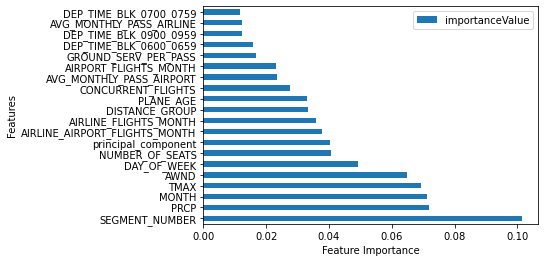

In [11]:
df5.plot.barh()
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.show()